# Simple classification
First we import the necessary packages and generate our datasets

In [4]:
from mp1 import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.utils import to_categorical
from keras.regularizers import l2

In [4]:
[X_train1, Y_train1] = generate_dataset_classification(300, 20)
Y_train1 = to_categorical(Y_train1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


### First neural network (simple)
We then load our neural network: simple linear classifier with 3 neurons, using softmax for output, cross-entropy as loss and printing accuracy as gradient descent occurs.

In [5]:
model1 = Sequential()
model1.add(Dense(3, input_shape=(5184,), activation='softmax'))
model1.compile(optimizer='sgd', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [6]:
model1.fit(X_train1[0:200], Y_train1[0:200], 
          validation_data=(X_train1[200:300], Y_train1[200:300]),
          epochs=20, batch_size=32)

Train on 200 samples, validate on 100 samples
Epoch 1/20
200/200 [==============================] - 0s 845us/step - loss: 7.8566 - acc: 0.3850 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 2/20
200/200 [==============================] - 0s 103us/step - loss: 10.0738 - acc: 0.3750 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 3/20
200/200 [==============================] - 0s 110us/step - loss: 10.0738 - acc: 0.3750 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 4/20
200/200 [==============================] - 0s 93us/step - loss: 10.0738 - acc: 0.3750 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 5/20
200/200 [==============================] - 0s 93us/step - loss: 10.0738 - acc: 0.3750 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 6/20
200/200 [==============================] - 0s 88us/step - loss: 10.0738 - acc: 0.3750 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 7/20
200/200 [==============================] - 0s 85us/step - loss: 10.0738 - acc: 0.3750 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 8

Instead of having to optimize the different settings of the Stochastic Gradient Descent, switching to Adam ensures great convergence.

In [8]:
model1 = Sequential()
model1.add(Dense(3, input_shape=(5184,), activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
model1.fit(X_train1[0:200], Y_train1[0:200], 
          validation_data=(X_train1[200:300], Y_train1[200:300]),
          epochs=20, batch_size=32)

Train on 200 samples, validate on 100 samples
Epoch 1/20
200/200 [==============================] - 1s 3ms/step - loss: 2.2047 - acc: 0.3750 - val_loss: 1.4232 - val_acc: 0.6300
Epoch 2/20
200/200 [==============================] - 0s 108us/step - loss: 1.2395 - acc: 0.4650 - val_loss: 0.7129 - val_acc: 0.6800
Epoch 3/20
200/200 [==============================] - 0s 95us/step - loss: 0.7134 - acc: 0.7500 - val_loss: 0.5657 - val_acc: 0.7500
Epoch 4/20
200/200 [==============================] - 0s 93us/step - loss: 0.5427 - acc: 0.7400 - val_loss: 0.4673 - val_acc: 0.8400
Epoch 5/20
200/200 [==============================] - 0s 93us/step - loss: 0.5188 - acc: 0.7750 - val_loss: 0.3734 - val_acc: 0.8400
Epoch 6/20
200/200 [==============================] - 0s 93us/step - loss: 0.4507 - acc: 0.8050 - val_loss: 0.5473 - val_acc: 0.6600
Epoch 7/20
200/200 [==============================] - 0s 93us/step - loss: 0.4693 - acc: 0.7750 - val_loss: 0.3944 - val_acc: 0.8300
Epoch 8/20
200/200 [===

### Checking the classifier
We can check our classifier for all 3 classes

In [10]:
X_test1 = generate_a_rectangle()
X_test2 = generate_a_disk()
X_test3 = generate_a_triangle()[0]
X_test1 = X_test1.reshape(1, X_test1.shape[0])
X_test2 = X_test2.reshape(1, X_test2.shape[0])
X_test3 = X_test3.reshape(1, X_test3.shape[0])
print(model1.predict(X_test1))
print(model1.predict(X_test2))
print(model1.predict(X_test3))

[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]


### We then extract the weights and visualize them
We can even recognize the different shapes.

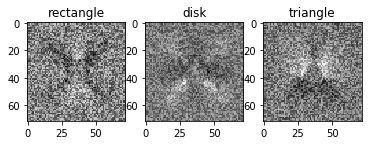

In [11]:
weights = model1.get_weights()[0].reshape(72,72,3)

plt.subplot(131)
plt.imshow(weights[:,:,0], cmap='gray')
plt.title('rectangle')

plt.subplot(132)
plt.imshow(weights[:,:,1], cmap='gray')
plt.title('disk')

plt.subplot(133)
plt.imshow(weights[:,:,2], cmap='gray')
plt.title('triangle')

plt.show()

# A more complicated classification problem
First we generate the data and reshape it for the needs of the convolutional neural network (CNN).
In order to have better results we use training and testing datasets that contain 1,000 images.
Our CNN reaches a performance of:
- 100% training accuracy
- 92% testing accuracy
- 0.3 loss

Note: implementing early stopping would have lowered the final loss reached but seemingly not improved accuracy at testing.

In [35]:
n_samples = 1000

[X_train2, Y_train2] = generate_dataset_classification(n_samples, 20, True)
[X_test2, Y_test2] = generate_test_set_classification(n_samples, True)
Y_train2 = to_categorical(Y_train2)
X_train2 = X_train2.reshape(n_samples,72,72,1)
X_test2 = X_test2.reshape(n_samples,72,72,1)

Creating data:
0
100
200
300
400
500
600
700
800
900
Creating data:


### Trying out the previous model
Spoilers: it doesn't work (because of changing shapes and positions)

In [36]:
X_train_temp = X_train2.reshape(n_samples, 5184)
X_test_temp = X_test2.reshape(n_samples, 5184)

model1.fit(X_train_temp, Y_train2, 
          validation_data=(X_test_temp, Y_test2),
          epochs=20, batch_size=32)

NameError: name 'model1' is not defined

### The final CNN used
64 filters of size 3x3 with 4x4 MaxPooling, 0.5 Dropout and a fully-connected 124-neuron hidden layer.
Loss: cross-entropy; optimizer: adam.

In [44]:
model2 = Sequential()
model2.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(72,72,1), activation='relu'))
model2.add(MaxPooling2D((4,4)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(124, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 70, 70, 64)        640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 18496)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 124)               2293628   
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 375       
Total params: 2,294,643
Trainable params: 2,294,643
Non-trainable params: 0
_________________________________________________________________


In [45]:
model2.fit(X_train2, Y_train2, 
          validation_data=(X_test2, Y_test2),
          epochs=50, batch_size=32)

Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 7s 7ms/step - loss: 1.1393 - acc: 0.4280 - val_loss: 0.9236 - val_acc: 0.5960
Epoch 2/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.8173 - acc: 0.6860 - val_loss: 0.7193 - val_acc: 0.7230
Epoch 3/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.6689 - acc: 0.7630 - val_loss: 0.6221 - val_acc: 0.8190
Epoch 4/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.5907 - acc: 0.7850 - val_loss: 0.5665 - val_acc: 0.8250
Epoch 5/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4878 - acc: 0.8570 - val_loss: 0.5335 - val_acc: 0.7800
Epoch 6/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4334 - acc: 0.8740 - val_loss: 0.5282 - val_acc: 0.8300
Epoch 7/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.3736 - acc: 0.8890 - val_loss: 0.4060 - val_acc: 0.8710
Epoch 8/50
100

In [48]:
model2.evaluate(X_test2, Y_test2)

1000/1000 [==============================] - 1s 1ms/step


[0.305499268271029, 0.916]

# Regression problem

Creating data:
0
100
200
Creating data:
0
100
200


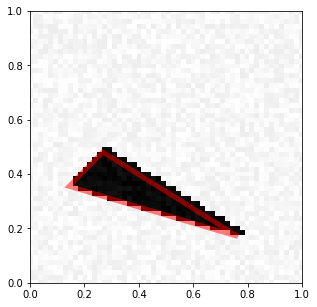

In [5]:
[X_train3, Y_train3] = generate_dataset_regression(300, 20)
[X_test3, Y_test3] = generate_test_set_regression()
visualize_prediction(X_train3[0], Y_train3[0])
X_train3 = X_train3.reshape(300,72,72,1)
X_test3 = X_test3.reshape(300,72,72,1)

In [33]:
# Y_train4 = Y_train3[:,0] + 1j*Y_train3[:,1]
# Y_test4 = Y_test3[:,0] + 1j*Y_test3[:,1]
print(Y_train3)

[[0.26757721 0.48112412 0.76431213 0.17054476 0.1437516  0.35509944]
 [0.79481373 0.11487104 0.7062271  0.09702195 0.79166516 0.77056239]
 [0.83656933 0.43076099 0.3169145  0.50228598 0.66236439 0.70288754]
 ...
 [0.12125088 0.67508107 0.94376656 0.60599557 0.88899422 0.77714618]
 [0.57105269 0.61907078 0.22192335 0.65471034 0.35605456 0.31938659]
 [0.89049572 0.09909284 0.58904792 0.45828835 0.81269583 0.84106874]]


In [ ]:
model3 = Sequential()
model3.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(72,72,1), activation='relu'))
model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(16, activation='relu'))
model3.add(Dense(2, activation='relu'))
model3.compile(optimizer='adam', loss='mean_squared_error')
print(model3.summary())

In [37]:
model3.fit(X_train3, Y_train3[:,0:2], 
          validation_data=(X_test3, Y_test3[:,0:2]),
          epochs=10, batch_size=32)

Train on 300 samples, validate on 300 samples
Epoch 1/10
300/300 [==============================] - 10s 32ms/step - loss: 0.3189 - val_loss: 0.3210
Epoch 2/10
300/300 [==============================] - 10s 32ms/step - loss: 0.3189 - val_loss: 0.3210
Epoch 3/10
300/300 [==============================] - 10s 34ms/step - loss: 0.3189 - val_loss: 0.3210
Epoch 4/10
300/300 [==============================] - 10s 32ms/step - loss: 0.3189 - val_loss: 0.3210
Epoch 5/10
300/300 [==============================] - 11s 35ms/step - loss: 0.3189 - val_loss: 0.3210
Epoch 6/10
300/300 [==============================] - 10s 33ms/step - loss: 0.3189 - val_loss: 0.3210
Epoch 7/10
300/300 [==============================] - 10s 33ms/step - loss: 0.3189 - val_loss: 0.3210
Epoch 8/10
300/300 [==============================] - 9s 31ms/step - loss: 0.3189 - val_loss: 0.3210
Epoch 9/10
300/300 [==============================] - 9s 31ms/step - loss: 0.3189 - val_loss: 0.3210
Epoch 10/10
300/300 [=================

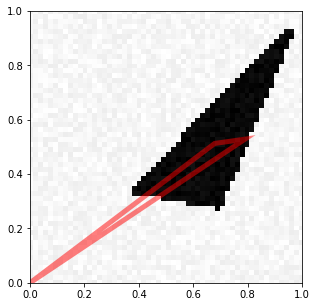

In [30]:
visualize_prediction(X_test3[0],model3.predict(X_test3)[0])

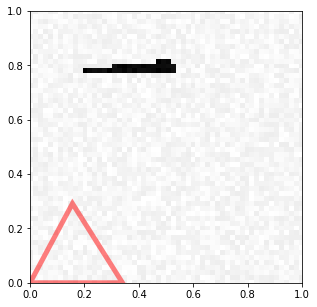

In [27]:
visualize_prediction(X_test3[1],model3.predict(X_test3)[1])